### Breast Cancer Classification

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

#### Dataset Citation

Source: https://www.kaggle.com/yasserh/breast-cancer-dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load the data
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#drop ids column
data.drop('id', axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Exploration Data Analysis

In [5]:
import matplotlib.pyplot as plt

In [6]:
corr_matrix = data.corr()

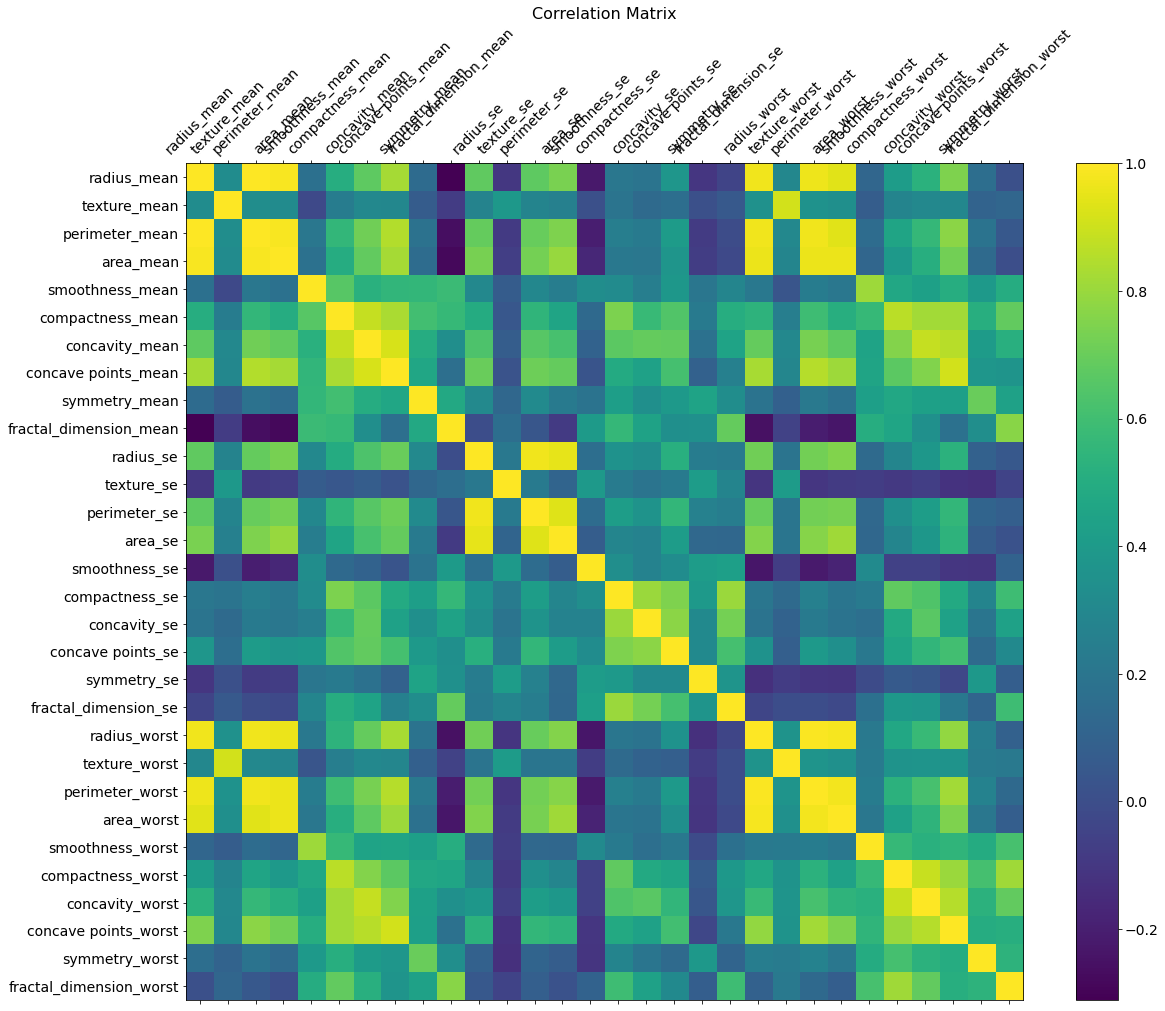

In [7]:
# show the correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Features Selection
Predictors have high multicolinearity so we the highly correlated features must be removed, this matrix is mirror, that mean we can just choose the above tringle.

In [8]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

/tmp/ipykernel_24608/1559577561.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [9]:
#Droping the column with high correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [10]:
data.drop(to_drop, axis=1, inplace=True)

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#rescale the feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(np.array(data[data.columns.difference(['diagnosis'])]))
data[data.columns.difference(['diagnosis'])] = scaled

#### Skewness
Skewness is a measure of symmetry. To be exact, it is a measure of lack of symmetry. This means that the larger the number is the more your data lack symmetry (not normal, that is).

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th></th>
    <th>Skewness</th>
  
  </tr>
  <tr>
    <td>Fairly Symmetrical</td>
    <td>-0.5 to 0.5</td>
  </tr>
  <tr>
    <td>Moderate Skewed</td>
    <td>-0.5 to -1.0 and 0.5 to 1.0</td>
  </tr>
  <tr>
    <td>Highly Skewed</td>
    <td>Less -1.0 and greater 1.0</td>
  </tr>
  
</table>

</body>
</html>



In [13]:
skew_info =pd.DataFrame(data[data.columns.difference(['diagnosis'])].skew(axis = 0)).reset_index()
skew_info = skew_info.rename(columns={'index': 'Feature', 0:"Skewness"})
skew_info.head()

,Feature,Skewness
0,compactness_mean,1.190123
1,compactness_se,1.902221
2,compactness_worst,1.473555
3,concave points_mean,1.171180
4,concave points_se,1.444678


In [14]:
# filter the features with high skewness
high_skwed = pd.DataFrame(skew_info[skew_info['Skewness']>1])
skewed_column =high_skwed['Feature'].values

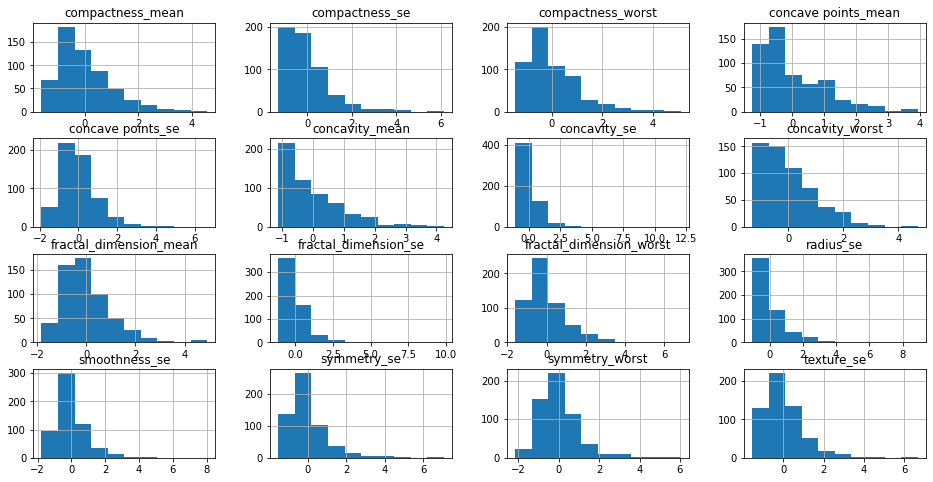

In [15]:
data[skewed_column].hist(figsize=(16,8));

### Transformation

In [16]:
#handel the skewed features:
import warnings
for column in data[skewed_column].columns:
    data[column] = np.log1p(np.abs(data[column]))

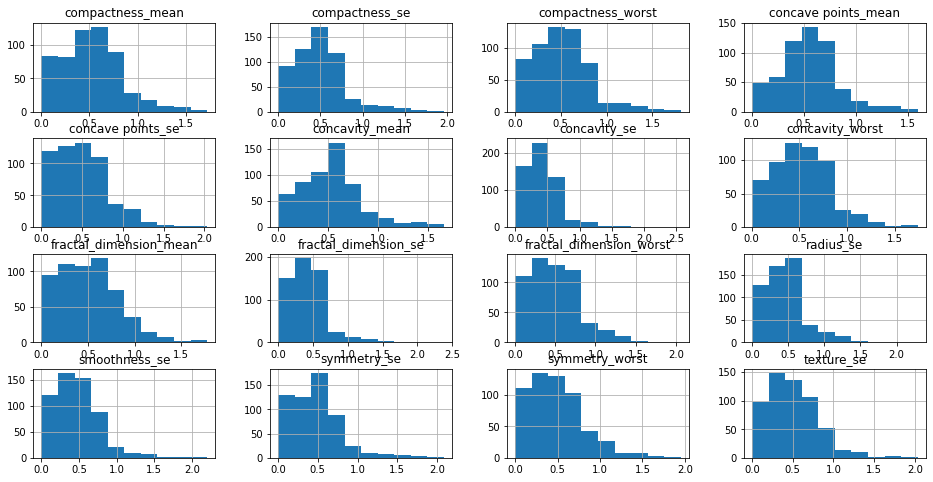

In [17]:
data[skewed_column].hist(figsize=(16,8));

### Prepar the Data

<AxesSubplot:>

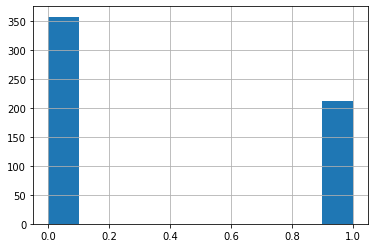

In [18]:
# encode the label
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(np.array(data['diagnosis']))
data['diagnosis'].hist()

In [19]:
#divide the data into train and test
n_train = len(data)
train_data = data.iloc[:int(n_train*0.80),:]
test_data = data.iloc[len(train_data):,:]

In [20]:
from sklearn.model_selection import train_test_split
#split the target from features
X, y = train_data.iloc[:,1:], train_data.iloc[:,0]
#split train and validation test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Data Validation
TFDV tool is used to analyis if this split is valid:
<ol>1- Train and validation data have the same distriution</ol>
<ol>2- Train and validation data have the same data type</ol>

In [23]:
import warnings
import tensorflow as tf
import tensorflow_data_validation as tfdv

/home/nasr/Downloads/recommender/recommender-env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [24]:
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

In [25]:
train_stats = tfdv.generate_statistics_from_csv(data_location='train.csv')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [26]:
tfdv.visualize_statistics(train_stats)

In [27]:
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'',INT,required,,-
'diagnosis',INT,required,,-
'radius_mean',FLOAT,required,,-
'texture_mean',FLOAT,required,,-
'smoothness_mean',FLOAT,required,,-
'compactness_mean',FLOAT,required,,-
'concavity_mean',FLOAT,required,,-
'concave points_mean',FLOAT,required,,-
'symmetry_mean',FLOAT,required,,-


In [28]:
eval_stats = tfdv.generate_statistics_from_csv(data_location='test.csv')

In [29]:
# docs-infra: no-execute
# Compare evaluation data with training data
tfdv.visualize_statistics(lhs_statistics=eval_stats, rhs_statistics=train_stats,
                          lhs_name='EVAL_DATASET', rhs_name='TRAIN_DATASET')


In [ ]:
# Check eval data for errors by validating the eval data stats using the previously inferred schema.
anomalies = tfdv.validate_statistics(statistics=eval_stats, schema=schema)
tfdv.display_anomalies(anomalies)


### Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# build binary classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
# find the traning accuracy
y_pred = classifier.predict(X_train)
print('Accuracy:%s ' % round(accuracy_score(y_train, y_pred)*100))

In [ ]:
import warnings
plot_confusion_matrix(classifier, X_val, y_val)  
plt.show()

### Save Model
after we get a minimum loss and high accurcy

In [ ]:
import pickle
savedModel = 'final_model.sav'
pickle.dump(classifier, open(savedModel, 'wb'))